In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from netCDF4 import Dataset
from tqdm.notebook import tqdm
import glob
import os
import wrf
import pyart
import pandas as pd
import datetime as dt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# PLOTAR L E H
def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], symbol, color=color, size=5,
                clip_on=True, horizontalalignment='center', verticalalignment='center',
                transform=transform)
        ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]],
                '\n' + str(np.int(data[mxy[i], mxx[i]])),
                color=color, size=5, clip_on=True, fontweight='bold',
                horizontalalignment='center', verticalalignment='top', transform=transform)

In [12]:
diretorio = '/home/lucas/wrf/trab_fabricio/'
os.chdir(diretorio)
print('Arquivos na pasta:\n\t',os.listdir())
print('\nAqui dentro dever conter os dados:\n\t', diretorio)

Arquivos na pasta:
	 ['3DVAR', 'results_TPSFC.png', 'wps', 'ensembles', 'run', 'crtm', '.ipynb_checkpoints', 'virg', 'trab_dinamica.pdf', 'outs', 'fc', 'Untitled.ipynb', 'trab_dinamica.tex', 'fields.ipynb', 'ass']

Aqui dentro dever conter os dados:
	 /home/lucas/wrf/trab_fabricio/


In [13]:
print('No meu caso eu organizei os dados separando em pastas: \n')
glob.glob(diretorio+'outs/*')

No meu caso eu organizei os dados separando em pastas: 



['/home/lucas/wrf/trab_fabricio/outs/out_wrfda_fdd',
 '/home/lucas/wrf/trab_fabricio/outs/out_wrf_fdd',
 '/home/lucas/wrf/trab_fabricio/outs/out_wrfda',
 '/home/lucas/wrf/trab_fabricio/outs/out_wrf']

In [ ]:
outs/

In [15]:
dataDaAnalise=dt.datetime(2020,7,1,0)
dataDaAnalise=np.datetime64(dataDaAnalise)
nc = Dataset(diretorio+'outs/out_wrf/wrfout_d01_2020-06-30_12:00:00')
idx_ = np.where(wrf.getvar(nc,'times',timeidx=wrf.ALL_TIMES)==dataDaAnalise)
print('Index do arquivo: \n\tData {}\n\tIndex'.format(dataDaAnalise), idx_[0][0])

Index do arquivo: 
	Data 2020-07-01T00:00:00.000000
	Index 360


In [16]:
horario = '{}/{:02d}/{:02d} {:02d}UTC'.format(pd.to_datetime(wrf.getvar(nc,'times',timeidx=idx_)).year[0],
                                              pd.to_datetime(wrf.getvar(nc,'times',timeidx=idx_)).month[0],
                                              pd.to_datetime(wrf.getvar(nc,'times',timeidx=idx_)).day[0],
                                              pd.to_datetime(wrf.getvar(nc,'times',timeidx=idx_)).hour[0])
print('Este servirá para usar no título: ',horario)

Este servirá para usar no título:  2020/07/01 00UTC


Text(1.0, 1.0, '2020/07/01 00UTC')

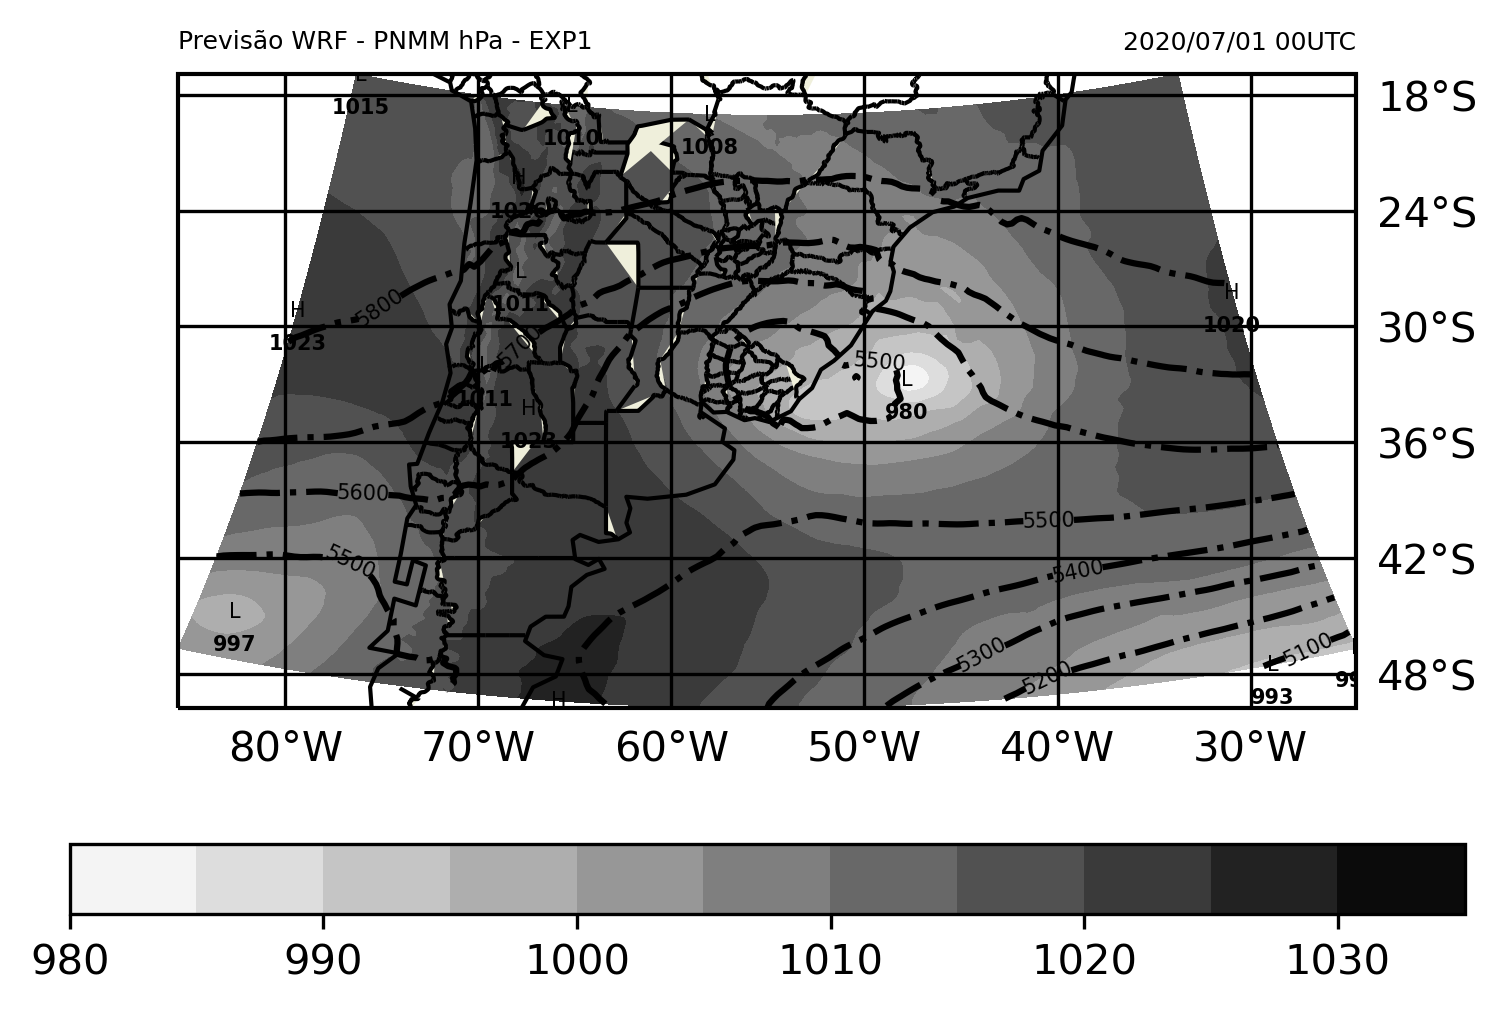

In [7]:
#SEM FILTRO
#SEM ASSIMILAÇÃO
#EXP1

nc = Dataset(diretorio+'outs/out_wrf/wrfout_d01_2020-06-30_12:00:00')


lon = wrf.getvar(nc,'lon')
lat = wrf.getvar(nc,'lat')
slp_ = wrf.getvar(nc,'slp',timeidx=360)

z = wrf.getvar(nc,'z',timeidx=360,units='m')
p = wrf.getvar(nc,'p',timeidx=360,units='hPa')
h_500 = wrf.interplevel(z,p,500)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
feature1=cf.NaturalEarthFeature(category='cultural', scale='10m',
                                name='admin_1_states_provinces_lines', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
feature2=cf.NaturalEarthFeature(category='cultural', scale='10m', 
                                name='admin_0_boundary_lines_land', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
ax.coastlines()
ax.add_feature(feature1)
ax.add_feature(feature2)
gl = ax.gridlines(draw_labels = True, crs = ccrs.PlateCarree(),color = 'black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = True
gl.ylabels_left = False
gl.xlabels_top = False
plot_maxmin_points(lon, lat, slp_, 'max', 50, symbol='H', color='black',  transform=ccrs.PlateCarree())
plot_maxmin_points(lon, lat, slp_, 'min', 25, symbol='L', color='black', transform=ccrs.PlateCarree())
#axxlabels_bottomntourf(lon.values,lat.values,psfc.values)as
cb = ax.contourf(lon,lat,slp_,np.arange(980,1040,5),cmap='gray_r')
lines = ax.contour(lon,lat,h_500.data[0],np.arange(5000,6000,100),colors='black',linestyles='-.')
plt.clabel(lines,  fmt='%1.0f',fontsize=5)
plt.colorbar(cb,orientation='horizontal',spacing='proportional')
plt.title('Previsão WRF - PNMM hPa - EXP1 ',fontsize=6,loc='left')
plt.title(horario,fontsize=6,loc='right')

Text(1.0, 1.0, '2020/07/01 00UTC')

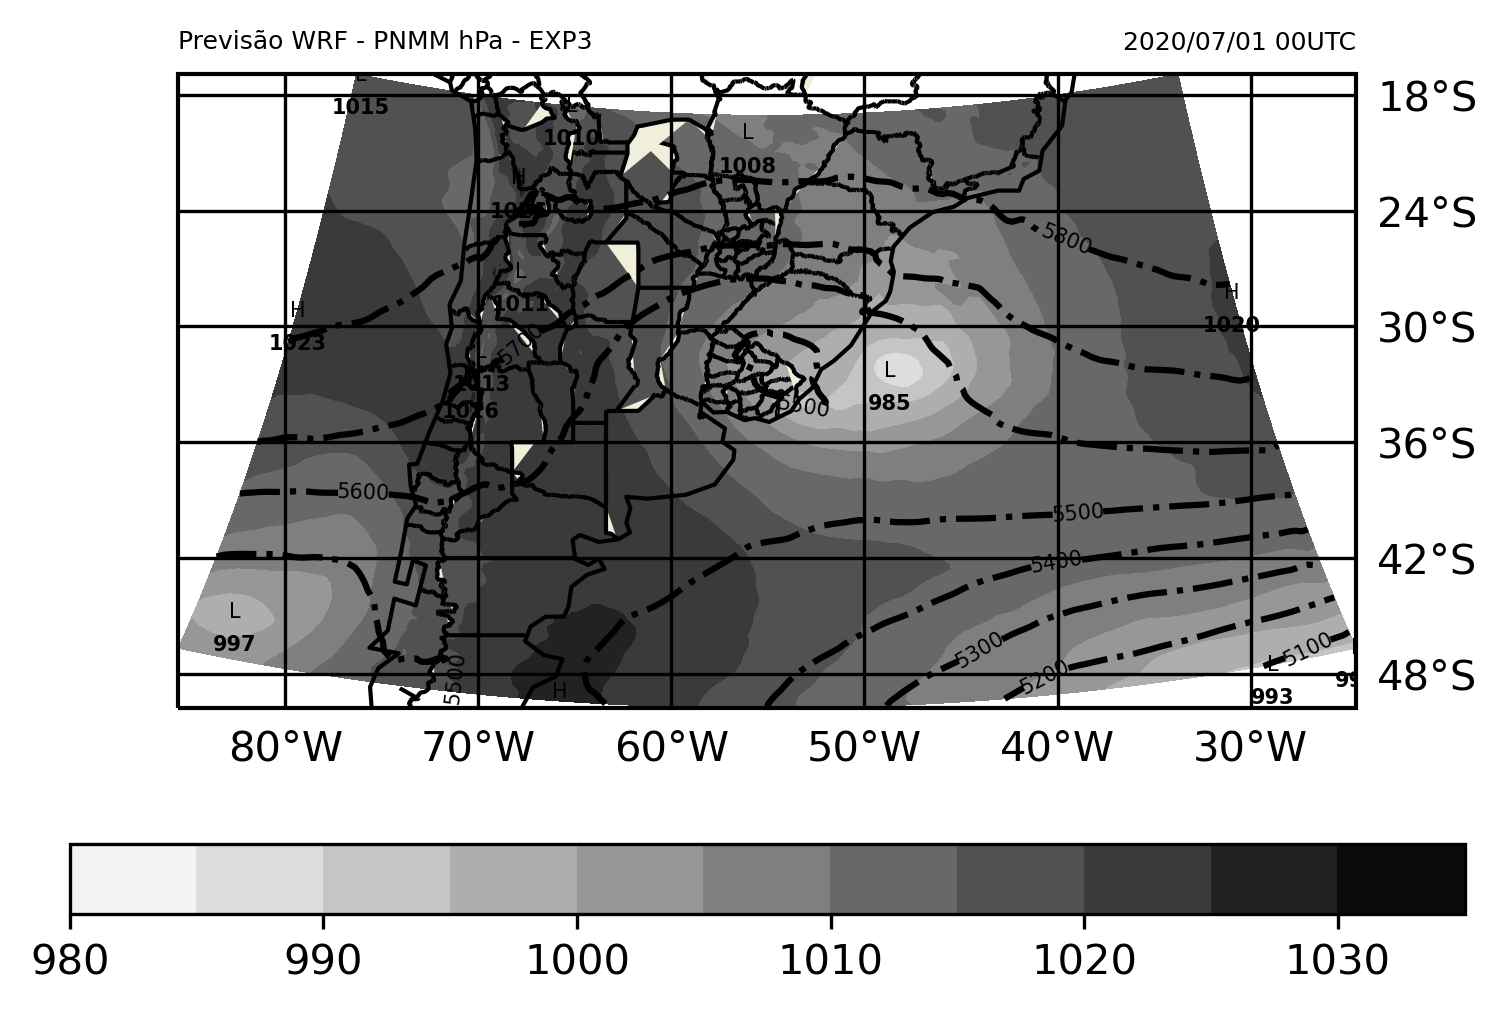

In [8]:
#SEM FILTRO
#COM ASSIMILAÇÃO
#EXP3

nc = Dataset(diretorio+'outs/out_wrfda/wrfout_d01_2020-06-30_12:00:00')


lon = wrf.getvar(nc,'lon')
lat = wrf.getvar(nc,'lat')
slp_ = wrf.getvar(nc,'slp',timeidx=360)

z = wrf.getvar(nc,'z',timeidx=360,units='m')
p = wrf.getvar(nc,'p',timeidx=360,units='hPa')
h_500 = wrf.interplevel(z,p,500)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
feature1=cf.NaturalEarthFeature(category='cultural', scale='10m',
                                name='admin_1_states_provinces_lines', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
feature2=cf.NaturalEarthFeature(category='cultural', scale='10m', 
                                name='admin_0_boundary_lines_land', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
ax.coastlines()
ax.add_feature(feature1)
ax.add_feature(feature2)
gl = ax.gridlines(draw_labels = True, crs = ccrs.PlateCarree(),color = 'black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = True
gl.ylabels_left = False
gl.xlabels_top = False
plot_maxmin_points(lon, lat, slp_, 'max', 50, symbol='H', color='black',  transform=ccrs.PlateCarree())
plot_maxmin_points(lon, lat, slp_, 'min', 25, symbol='L', color='black', transform=ccrs.PlateCarree())
#axxlabels_bottomntourf(lon.values,lat.values,psfc.values)as
cb = ax.contourf(lon,lat,slp_,np.arange(980,1040,5),cmap='gray_r')
lines = ax.contour(lon,lat,h_500.data[0],np.arange(5000,6000,100),colors='black',linestyles='-.')
plt.clabel(lines,  fmt='%1.0f',fontsize=5)
plt.colorbar(cb,orientation='horizontal',spacing='proportional')
plt.title('Previsão WRF - PNMM hPa - EXP3 ',fontsize=6,loc='left')
plt.title(horario,fontsize=6,loc='right')

Text(1.0, 1.0, '2020/07/01 00UTC')

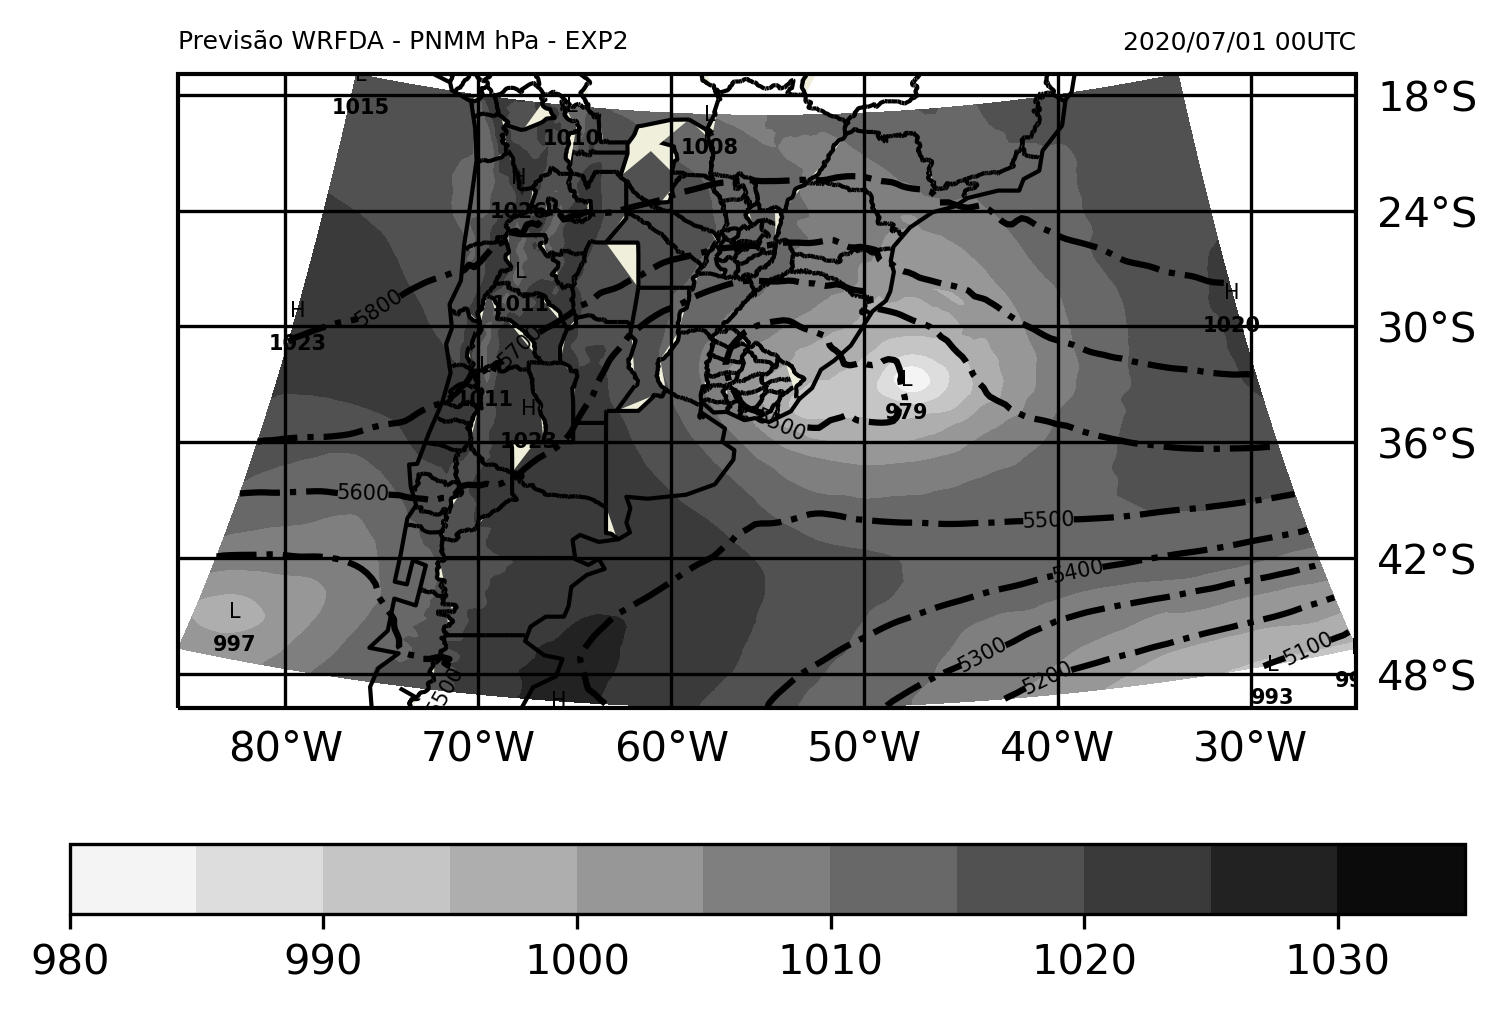

In [9]:
#COM FILTRO
#SEM ASSIMILAÇÃO
#EXP2

nc = Dataset(diretorio+'outs/out_wrf_fdd/wrfout_d01_2020-06-30_12:00:00')


lon = wrf.getvar(nc,'lon')
lat = wrf.getvar(nc,'lat')
slp_ = wrf.getvar(nc,'slp',timeidx=360)

z = wrf.getvar(nc,'z',timeidx=360,units='m')
p = wrf.getvar(nc,'p',timeidx=360,units='hPa')
h_500 = wrf.interplevel(z,p,500)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
feature1=cf.NaturalEarthFeature(category='cultural', scale='10m',
                                name='admin_1_states_provinces_lines', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
feature2=cf.NaturalEarthFeature(category='cultural', scale='10m', 
                                name='admin_0_boundary_lines_land', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
ax.coastlines()
ax.add_feature(feature1)
ax.add_feature(feature2)
gl = ax.gridlines(draw_labels = True, crs = ccrs.PlateCarree(),color = 'black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = True
gl.ylabels_left = False
gl.xlabels_top = False
plot_maxmin_points(lon, lat, slp_, 'max', 50, symbol='H', color='black',  transform=ccrs.PlateCarree())
plot_maxmin_points(lon, lat, slp_, 'min', 25, symbol='L', color='black', transform=ccrs.PlateCarree())
#axxlabels_bottomntourf(lon.values,lat.values,psfc.values)as
cb = ax.contourf(lon,lat,slp_,np.arange(980,1040,5),cmap='gray_r')
lines = ax.contour(lon,lat,h_500.data[0],np.arange(5000,6000,100),colors='black',linestyles='-.')
plt.clabel(lines,  fmt='%1.0f',fontsize=5)
plt.colorbar(cb,orientation='horizontal',spacing='proportional')
plt.title('Previsão WRFDA - PNMM hPa - EXP2 ',fontsize=6,loc='left')
plt.title(horario,fontsize=6,loc='right')

Text(1.0, 1.0, '2020/07/01 00UTC')

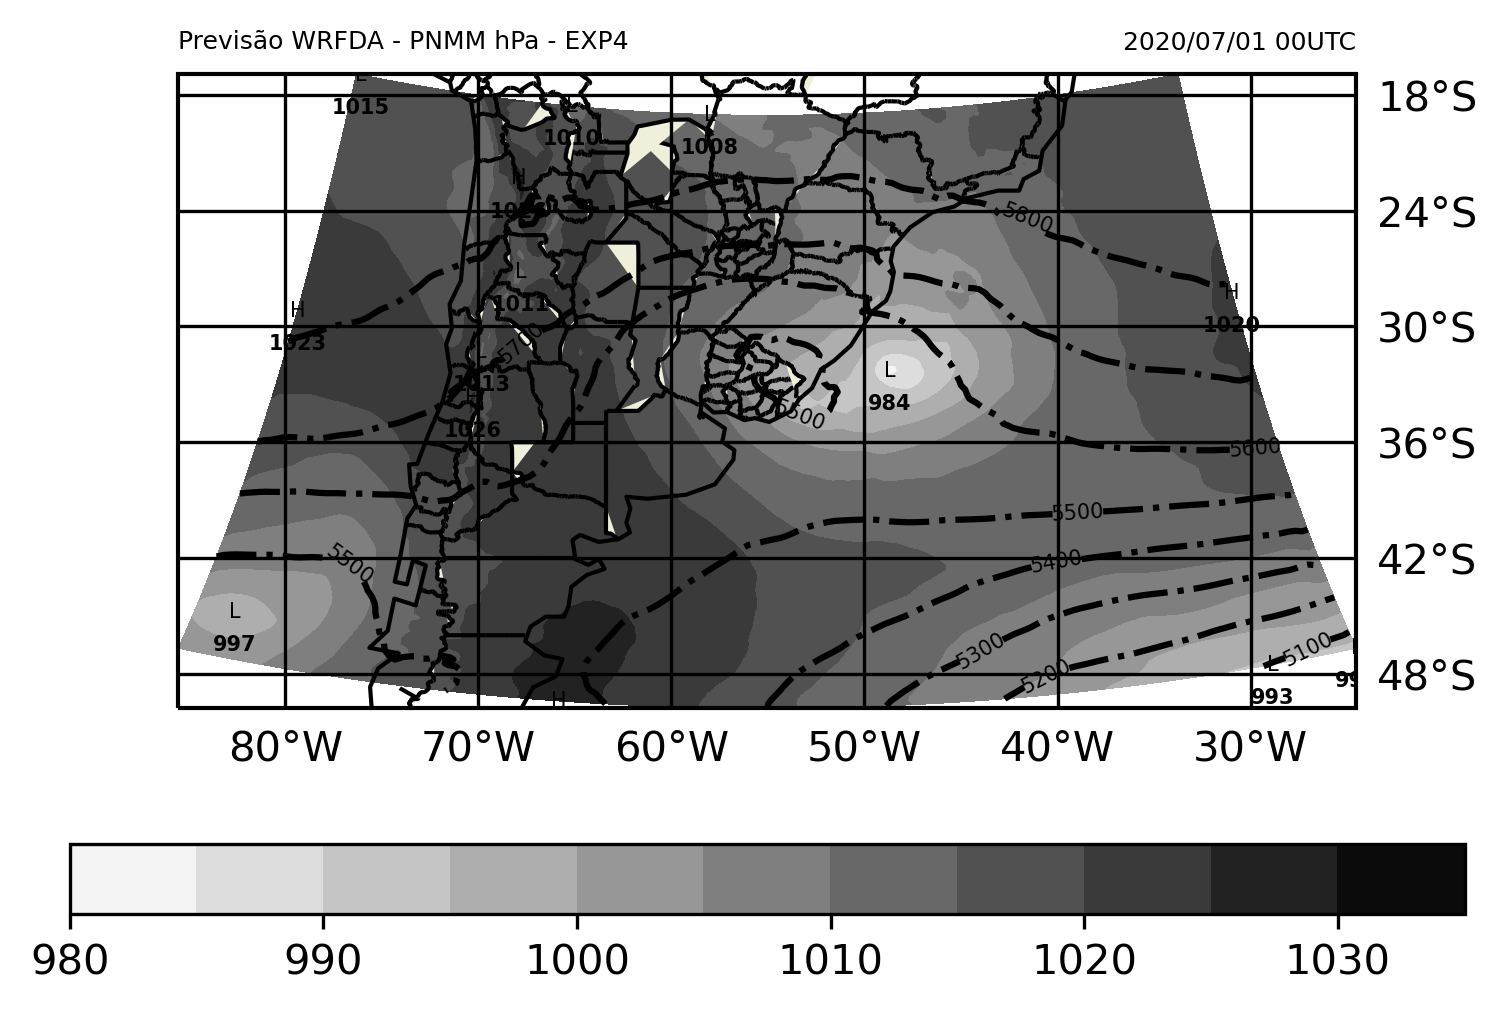

In [10]:
#COM FILTRO
#COM ASSIMILAÇÃO
#EXP4

nc = Dataset(diretorio+'outs/out_wrfda_fdd//wrfout_d01_2020-06-30_12:00:00')


lon = wrf.getvar(nc,'lon')
lat = wrf.getvar(nc,'lat')
slp_ = wrf.getvar(nc,'slp',timeidx=360)

z = wrf.getvar(nc,'z',timeidx=360,units='m')
p = wrf.getvar(nc,'p',timeidx=360,units='hPa')
h_500 = wrf.interplevel(z,p,500)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
feature1=cf.NaturalEarthFeature(category='cultural', scale='10m',
                                name='admin_1_states_provinces_lines', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
feature2=cf.NaturalEarthFeature(category='cultural', scale='10m', 
                                name='admin_0_boundary_lines_land', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
ax.coastlines()
ax.add_feature(feature1)
ax.add_feature(feature2)
gl = ax.gridlines(draw_labels = True, crs = ccrs.PlateCarree(),color = 'black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = True
gl.ylabels_left = False
gl.xlabels_top = False
plot_maxmin_points(lon, lat, slp_, 'max', 50, symbol='H', color='black',  transform=ccrs.PlateCarree())
plot_maxmin_points(lon, lat, slp_, 'min', 25, symbol='L', color='black', transform=ccrs.PlateCarree())
#axxlabels_bottomntourf(lon.values,lat.values,psfc.values)as
cb = ax.contourf(lon,lat,slp_,np.arange(980,1040,5),cmap='gray_r')
lines = ax.contour(lon,lat,h_500.data[0],np.arange(5000,6000,100),colors='black',linestyles='-.')
plt.clabel(lines,  fmt='%1.0f',fontsize=5)
plt.colorbar(cb,orientation='horizontal',spacing='proportional')
plt.title('Previsão WRFDA - PNMM hPa - EXP4 ',fontsize=6,loc='left')
plt.title(horario,fontsize=6,loc='right')

Text(1.0, 1.0, '2020/06/30 12UTC')

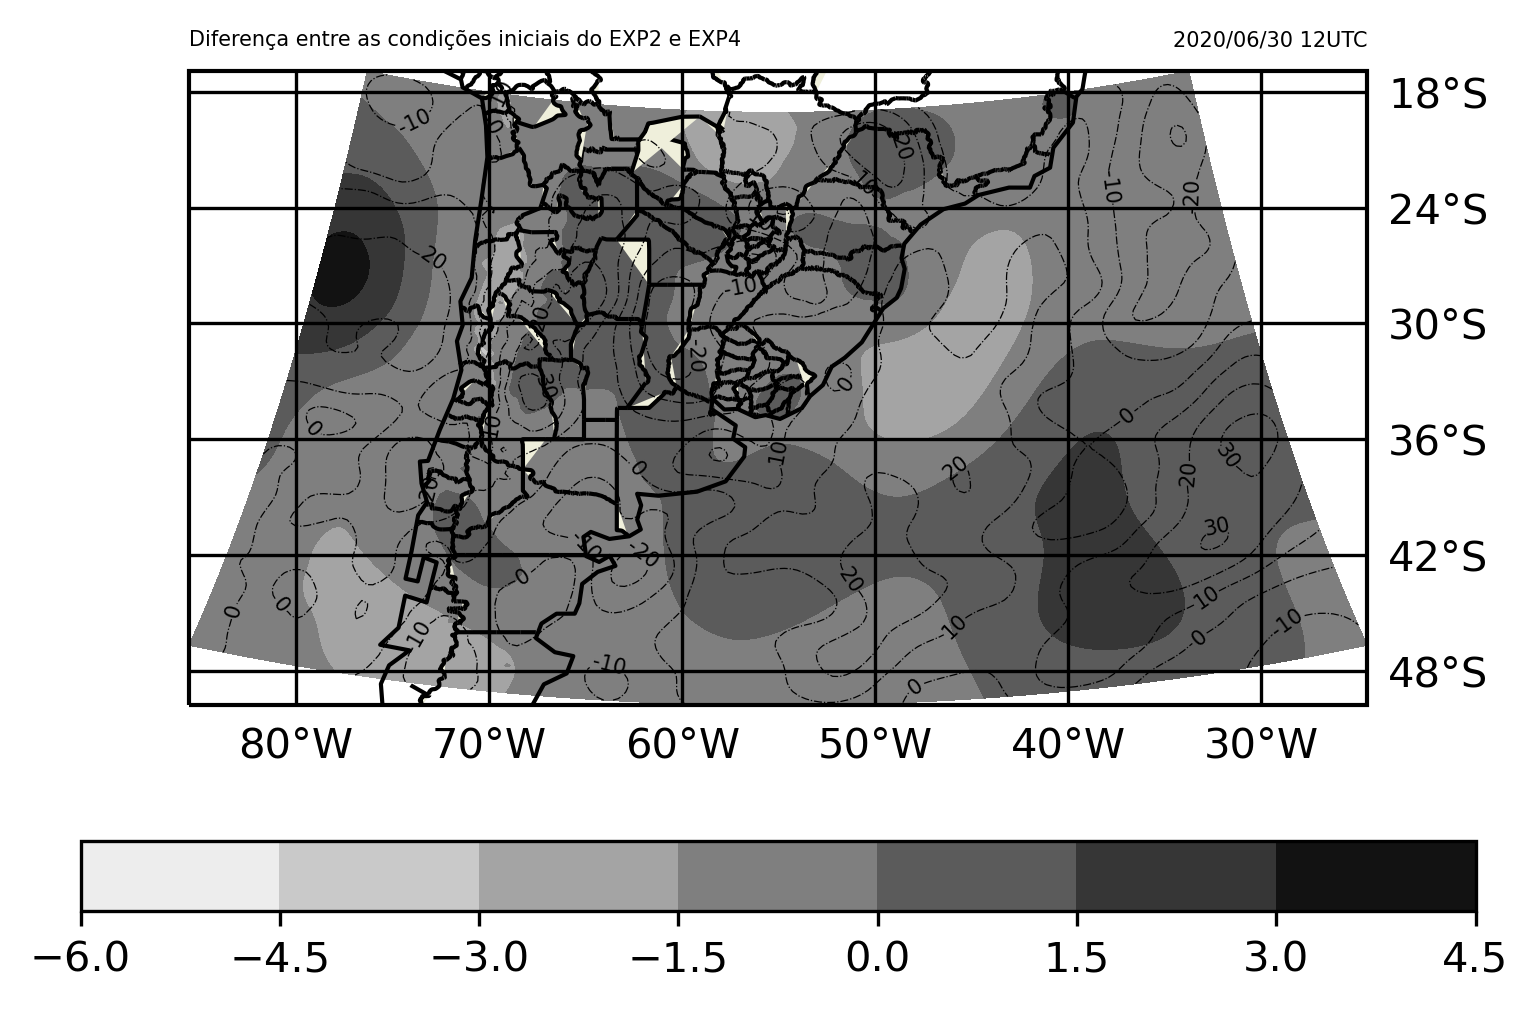

In [33]:
nc = Dataset(diretorio+'virg/wrfinput_d01')
nc2 = Dataset(diretorio+'ass/wrfinput_d01')

lon = wrf.getvar(nc,'lon')
lat = wrf.getvar(nc,'lat')

slp_ = wrf.getvar(nc,'slp')
slp_2 = wrf.getvar(nc2,'slp')
delta_slp = slp_ - slp_2


z = wrf.getvar(nc,'z',units='m')
p = wrf.getvar(nc,'p',units='hPa')
h_500 = wrf.interplevel(z,p,500)

z2 = wrf.getvar(nc2,'z',units='m')
p2 = wrf.getvar(nc2,'p',units='hPa')
h_5002 = wrf.interplevel(z2,p2,500)

delta_h500 = h_500 - h_5002



fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
feature1=cf.NaturalEarthFeature(category='cultural', scale='10m',
                                name='admin_1_states_provinces_lines', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
feature2=cf.NaturalEarthFeature(category='cultural', scale='10m', 
                                name='admin_0_boundary_lines_land', 
                                color='black' ,edgecolor='face',
                                        facecolor=cf.COLORS['land'])
ax.coastlines()
ax.add_feature(feature1)
ax.add_feature(feature2)
gl = ax.gridlines(draw_labels = True, crs = ccrs.PlateCarree(),color = 'black')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = True
gl.ylabels_left = False
gl.xlabels_top = False
cb = ax.contourf(lon,lat,delta_slp,cmap='gray_r')
lines = ax.contour(lon,lat,delta_h500.data[0],colors='black',linestyles='-.',linewidths=0.3)
plt.clabel(lines,  fmt='%1.0f',fontsize=5)
plt.colorbar(cb,orientation='horizontal',spacing='proportional')
plt.title('Diferença entre as condições iniciais do EXP2 e EXP4',fontsize=5,loc='left')
plt.title('{}/{:02d}/{:02d} {:02d}UTC'.format(2020,6,30,12),fontsize=5,loc='right')

In [17]:
diretorio

'/home/lucas/wrf/trab_fabricio/'